## Line broadening

In [97]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [82]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\Values_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\Values_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate


### Core curvature vs Line Depth

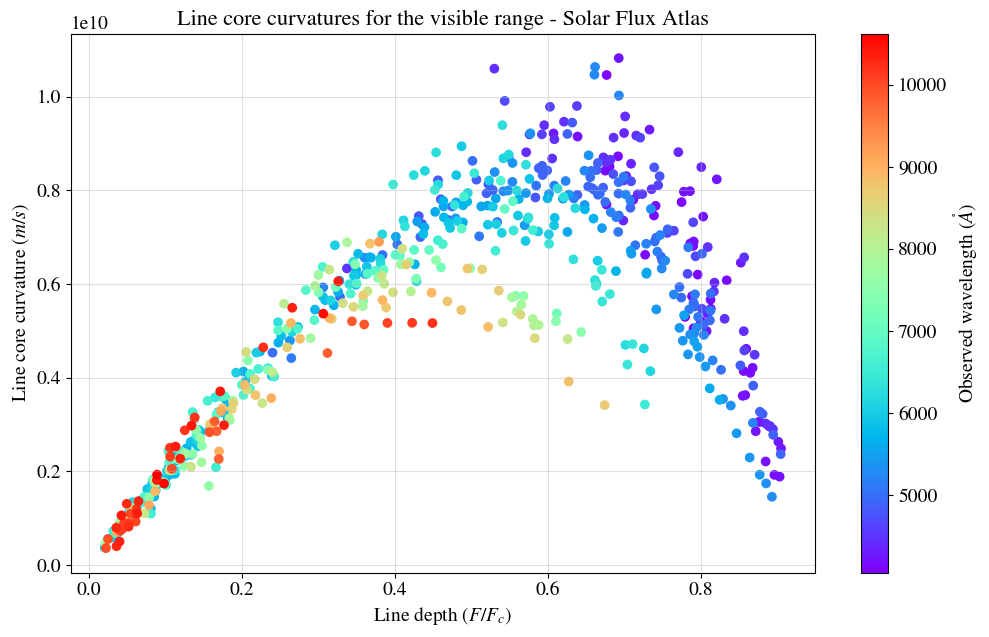

In [101]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Core curvature'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line core curvatures for the visible range - Solar Flux Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Line core curvature $(m/s)$')
ax.grid(alpha=0.4)

fig1.savefig('Curvature_VIS')

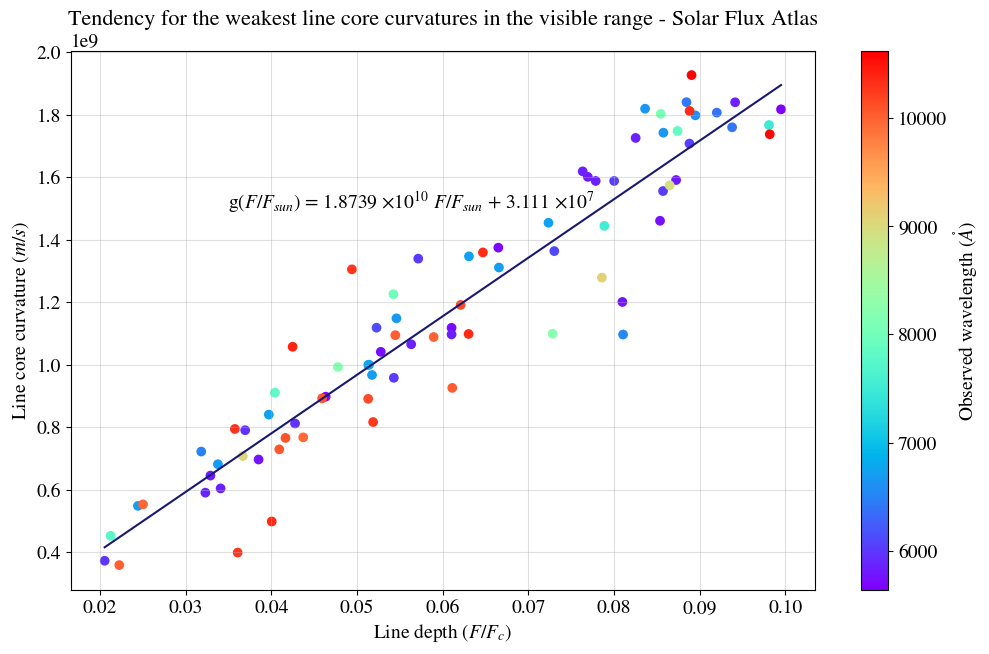

In [110]:
#Select only the slope for small line depth
values_VIS_line = VIS_data[VIS_data['Line Depth'].between(0.0,0.1,inclusive='right')]

#Made a polynomial first order fit
pol = Polynomial.fit(values_VIS_line['Line Depth'],values_VIS_line['Core curvature'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_line['Line Depth']), max(values_VIS_line['Line Depth']), len(values_VIS_line['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Tendency for the weakest line core curvatures in the visible range - Solar Flux Atlas')

scatter = ax1.scatter(values_VIS_line['Line Depth'],values_VIS_line['Core curvature'],c=values_VIS_line["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.035,1.5e9,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-10,4)} $\times 10^{{10}}$ $F/F_{{sun}}$ + {round(param[0]*1e-7,4)} $\times 10^{{7}}$',c='k')
ax1.set_ylabel(r'Line core curvature $(m/s)$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both')

# fig2.savefig('Curvature_Slope_VIS')

In [106]:
param

array([3.11096970e+07, 1.87386888e+10])

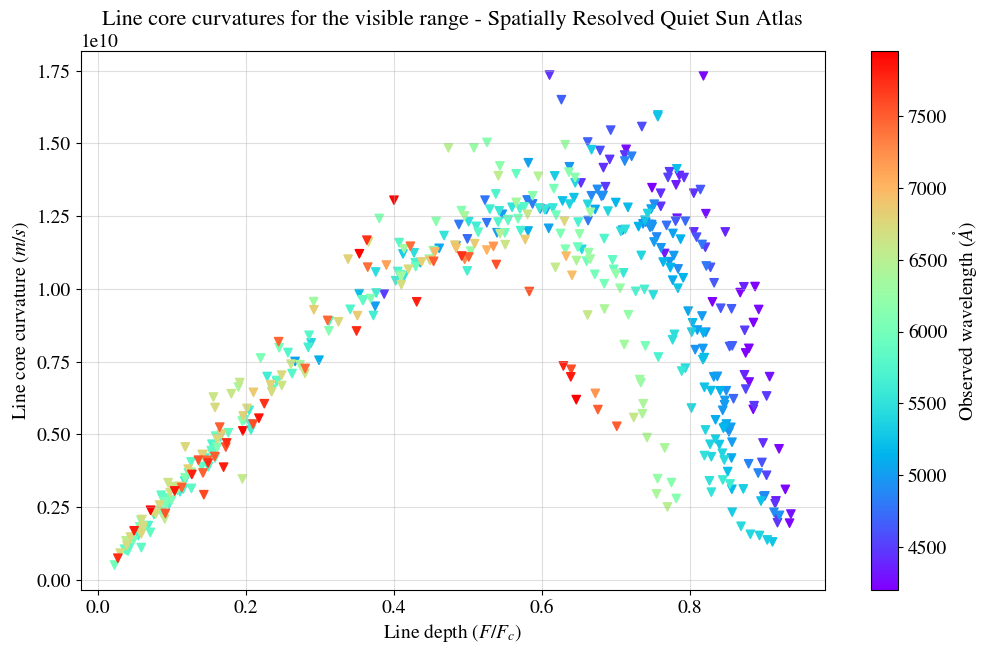

In [ ]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Core curvature'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line core curvatures for the visible range - Spatially Resolved Quiet Sun Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Line core curvature $(m/s)$')
ax.grid(alpha=0.4)

# fig3.savefig('Curvature_SPA')

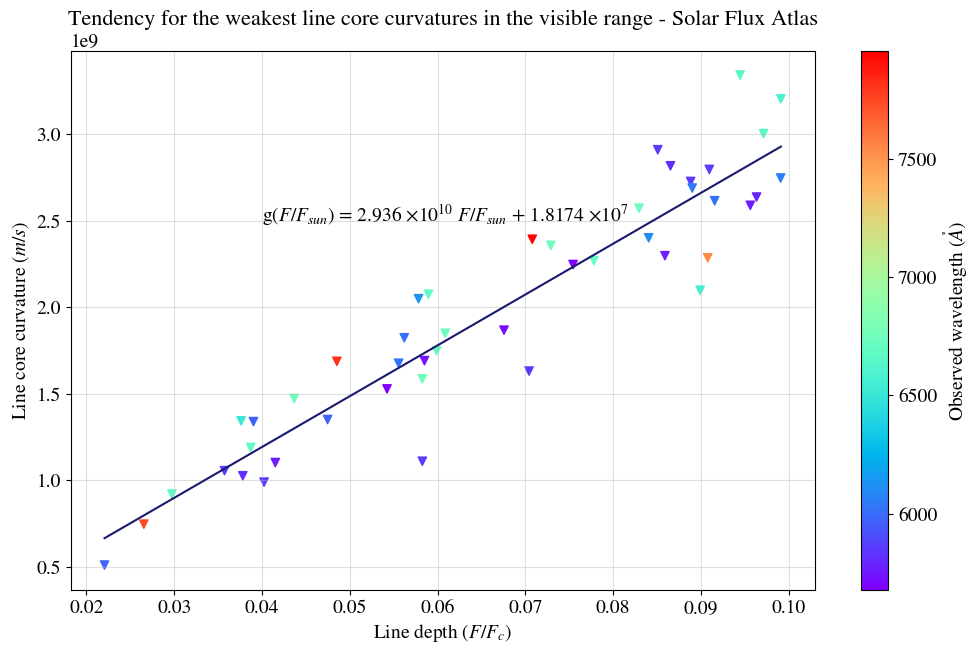

In [112]:
#Select only the slope for small line depth
values_SPA_line = SPA_data[SPA_data['Line Depth'].between(0.0,0.1,inclusive='right')]

#Made a polynomial first order fit
pol = Polynomial.fit(values_SPA_line['Line Depth'],values_SPA_line['Core curvature'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_SPA_line['Line Depth']), max(values_SPA_line['Line Depth']), len(values_SPA_line['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig4, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Tendency for the weakest line core curvatures in the visible range - Solar Flux Atlas')

scatter = ax1.scatter(values_SPA_line['Line Depth'],values_SPA_line['Core curvature'],c=values_SPA_line["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.04,2.5e9,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-10,4)} $\times 10^{{10}}$ $F/F_{{sun}}$ + {round(param[0]*1e-7,4)} $\times 10^{{7}}$',c='k')
ax1.set_ylabel(r'Line core curvature $(m/s)$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both')

# fig4.savefig('Curvature_Slope_SPA')

In [88]:
param

array([1.81736361e+07, 2.93603031e+10])

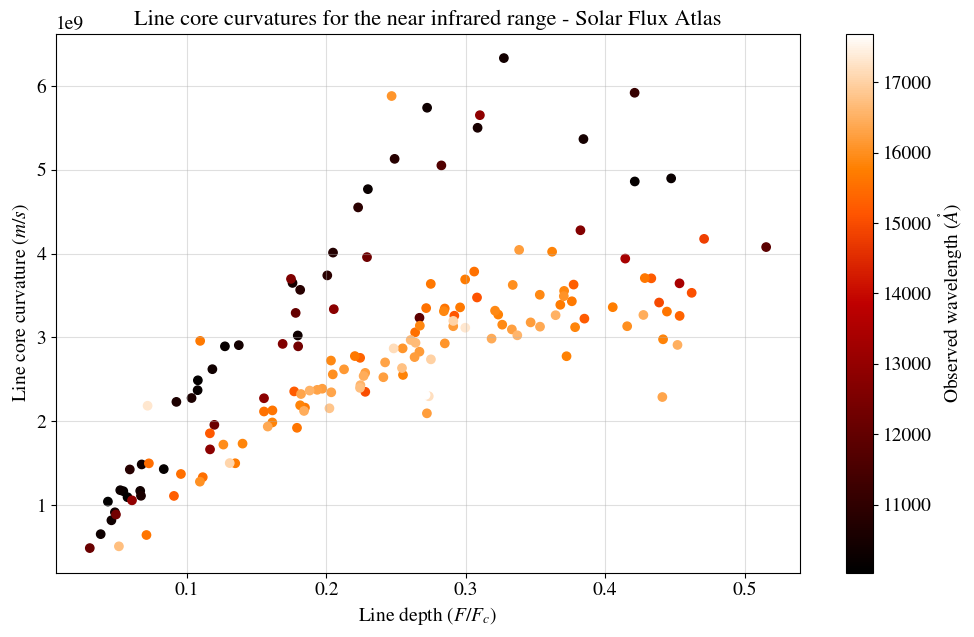

In [103]:
fig5, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Core curvature'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line core curvatures for the near infrared range - Solar Flux Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Line core curvature $ (m/s)$')
ax.grid(alpha=0.4)

# fig5.savefig('Curvature_NIR')

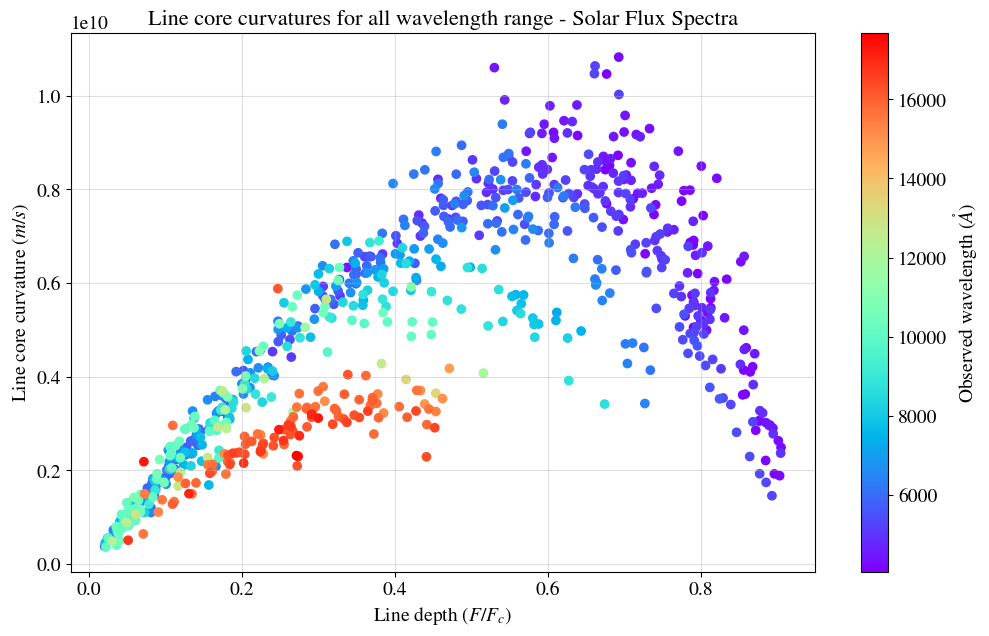

In [ ]:
fig6, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(ALL_data['Line Depth'],ALL_data['Core curvature'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line core curvatures for all wavelength range - Solar Flux Spectra')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Line core curvature $(m/s)$')

ax.grid(alpha=0.4)

# fig6.savefig('Curvature_ALL')